In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report

import joblib
import itertools

import preprocessing as pp

from importlib import reload
pd.options.mode.chained_assignment = None

In [2]:
reload(pp);

In [3]:
#Load dataset, regroup classification in superclasses, and keep only those with data > 5000
df = pp.load_datasets()
df = pp.prepare_target(df)

Complete DataFrame has 471149 lines and 16 columns
Final DataFrame has 301103 lines and 16 columns after removing all classes with less than 5000 items


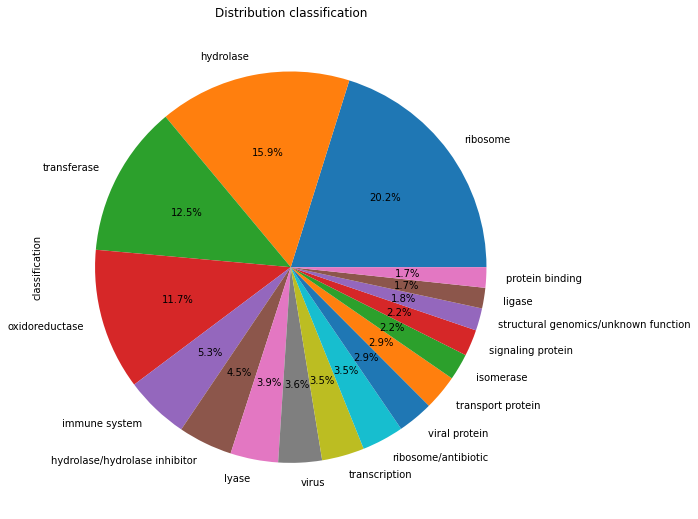

In [4]:
df.classification.value_counts().plot(kind="pie", figsize=(9,9), title='Distribution classification', autopct='%1.1f%%');

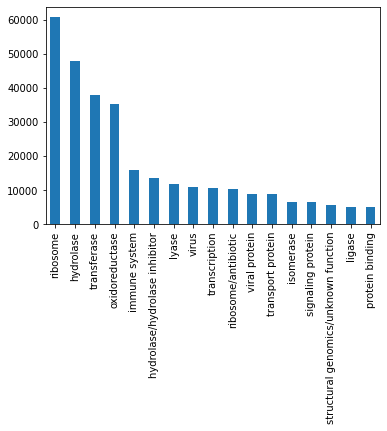

In [5]:
df.classification.value_counts().plot(kind='bar');
#Other classes regroup several classes, worth being kept to be able to check if the model can 
#properly detect that. Studying the behavior of this other_classes may also be relevant

In [6]:
#Get  train / test data 
data = df.drop('classification', axis = 1)
target = df.classification
X_train, X_test, y_train,  y_test = train_test_split(data, target, test_size=0.3, random_state=452)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210772, 15), (90331, 15), (210772,), (90331,))

In [7]:
#Feature selection
rfe = RFE(ExtraTreesClassifier(), n_features_to_select=8,verbose=1)

In [8]:
#Pipeline
# We will test with and without feature reductionc&
steps = [('preprocessing', pp.PreprocessingTransformer(verbose=True)),
         ('rfe', rfe),
         ('clf', ExtraTreesClassifier(max_depth=50))
         ]


pipe = Pipeline(steps, verbose=True)
pipe.fit(X_train, y_train)

-- Fit done -- 
1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
[Pipeline] ..... (step 1 of 3) Processing preprocessing, total=   4.2s
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
[Pipeline] ............... (step 2 of 3) Processing rfe, total= 2.3min
[Pipeline] ............... (step 3 of 3) Processing clf, total=  24.4s


Pipeline(steps=[('preprocessing', PreprocessingTransformer()),
                ('rfe',
                 RFE(estimator=ExtraTreesClassifier(), n_features_to_select=8,
                     verbose=1)),
                ('clf', ExtraTreesClassifier(max_depth=50))],
         verbose=True)

In [9]:
print("score on Train set:", pipe.score(X_train, y_train))
print("score on Test set:", pipe.score(X_test, y_test))

1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
score on Train set: 0.9995018313627996
1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
score on 

In [10]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
                                      precision    recall  f1-score   support

                           hydrolase       0.78      0.88      0.83     14290
       hydrolase/hydrolase inhibitor       0.90      0.86      0.88      3981
                       immune system       0.92      0.92      0.92      4753
                           isomerase       0.94      0.79      0.85      1988
                              ligase       0.89      0.77      0.83      1452
                               lyase       0.93      0.

In [11]:
def plot_confusion_matrix(cm, classes):

    plt.figure(figsize=(15,15))
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ', fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=12)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=12,color='black')
    plt.xlabel('Predicted label',fontsize=12,color='black' )
    np.set_printoptions(precision=2)

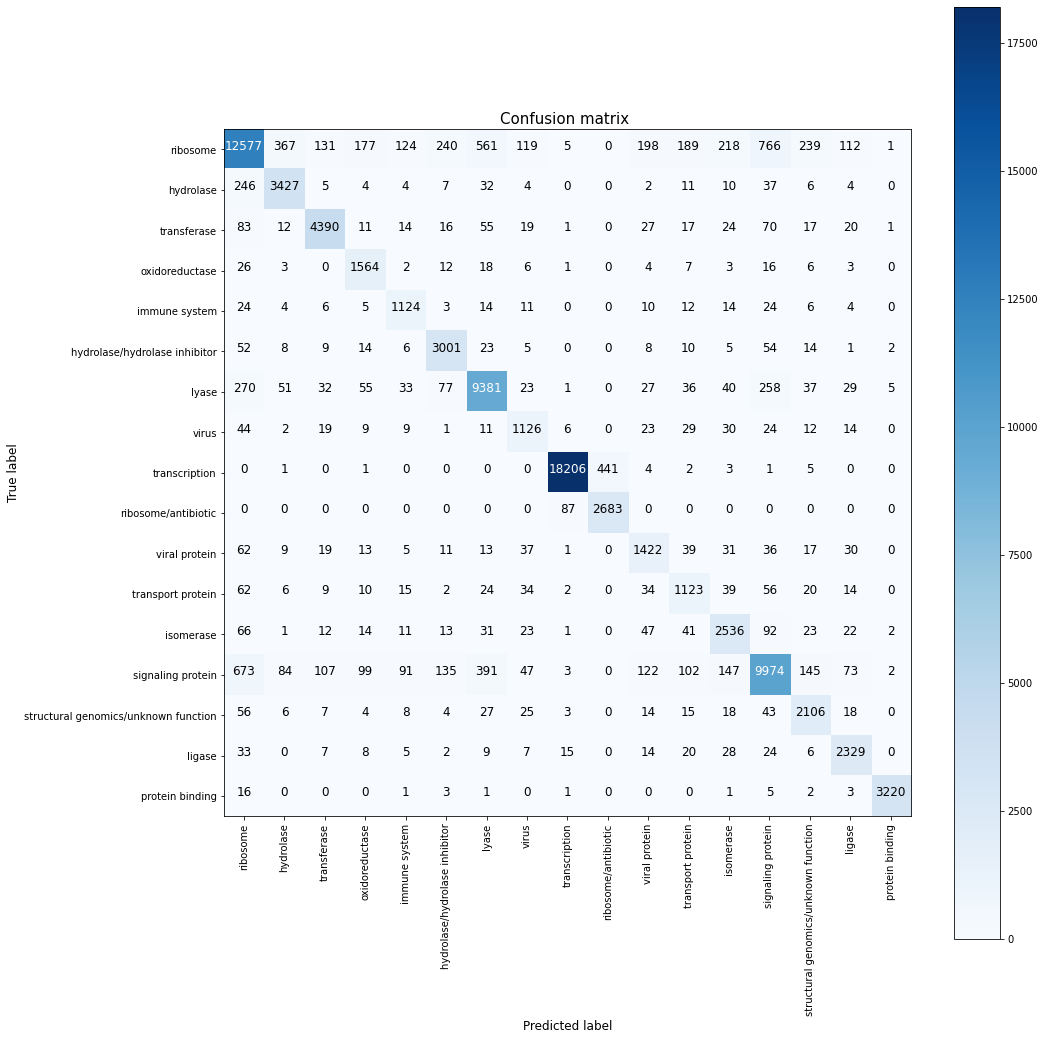

In [12]:
cm = confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm, y_train.value_counts().index)

## Test des modèles sans feature selection 


In [13]:

steps_2 = [('preprocessing', pp.PreprocessingTransformer(verbose=True)),
         ('clf', ExtraTreesClassifier(max_depth=50))
         ]


pipe_no_rfe = Pipeline(steps_2, verbose=True)
pipe_no_rfe.fit(X_train, y_train)

-- Fit done -- 
1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   4.2s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  27.8s


Pipeline(steps=[('preprocessing', PreprocessingTransformer()),
                ('clf', ExtraTreesClassifier(max_depth=50))],
         verbose=True)

In [14]:
print("score on Train set:", pipe_no_rfe.score(X_train, y_train))
print("score on Test set:", pipe_no_rfe.score(X_test, y_test))

1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
score on Train set: 0.9995018313627996
1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
score on 

In [15]:
y_pred_no_rfe = pipe_no_rfe.predict(X_test)
print(classification_report(y_test, y_pred_no_rfe))

1.Drop useless columns
2.Replace missing values in X
3.Reduce modalities
4.Correct skewness
5.scale and encode categ values
-- Preprocessing done -- 
[Columns] :  Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'macromoleculeType_DNA', 'macromoleculeType_Protein',
       'macromoleculeType_RNA', 'phValue_acide', 'phValue_basique',
       'phValue_neutre'],
      dtype='object')
                                      precision    recall  f1-score   support

                           hydrolase       0.78      0.88      0.83     14290
       hydrolase/hydrolase inhibitor       0.91      0.86      0.88      3981
                       immune system       0.92      0.92      0.92      4753
                           isomerase       0.92      0.79      0.85      1988
                              ligase       0.90      0.77      0.83      1452
                               lyase       0.94      0.

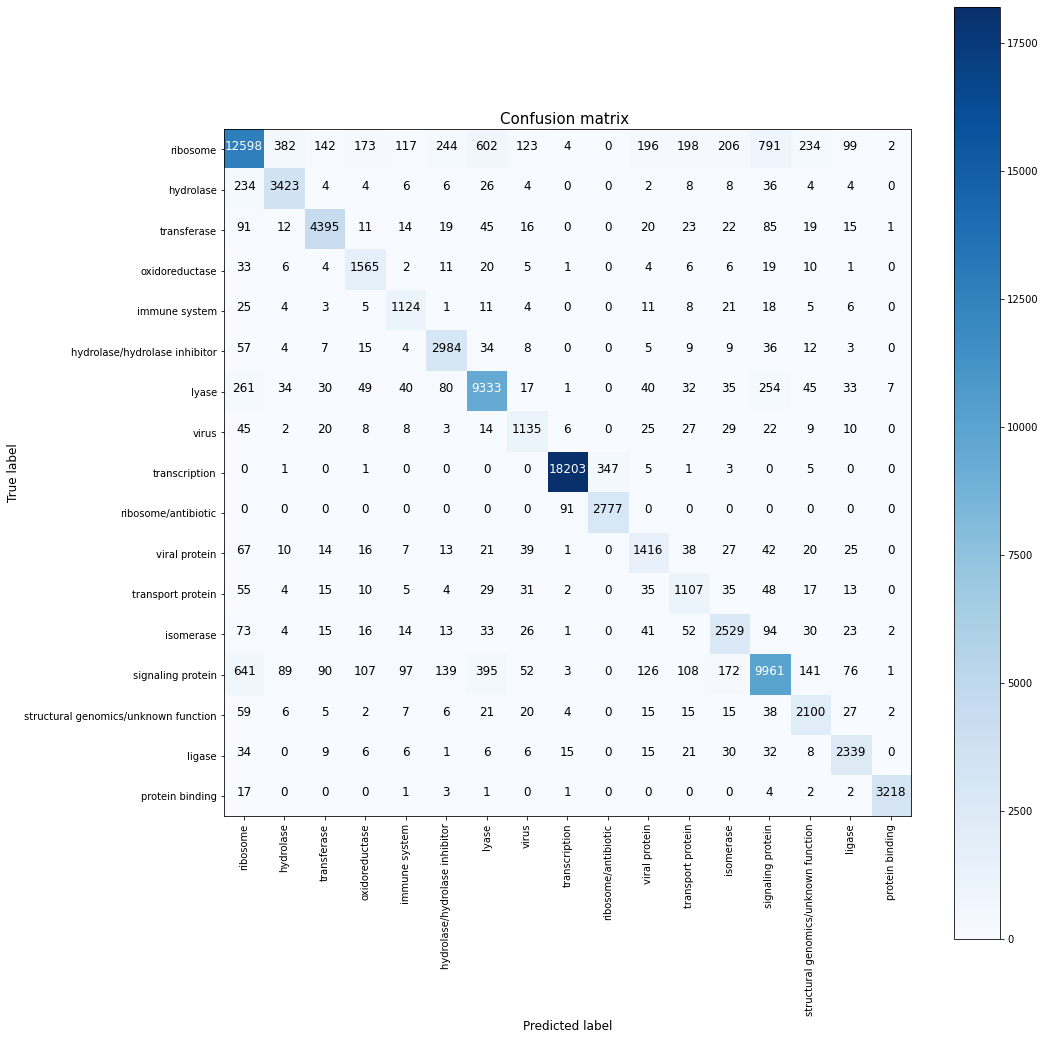

In [16]:
cm2 = confusion_matrix(y_pred_no_rfe,y_test)
plot_confusion_matrix(cm2, y_train.value_counts().index)

In [17]:
# Pas de grandes différences entre 6 et 15 variables en input.
# Les variables numériques initiales constituent la base de décision du modèle

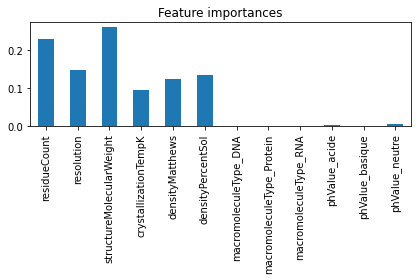

In [18]:
names = pipe_no_rfe['clf'].feature_names_in_
importances = pipe_no_rfe['clf'].feature_importances_
forest_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [19]:
#Save complete classifier
joblib.dump(pipe['clf'], '../models/prot_clf_1.joblib')

['../models/prot_clf_1.joblib']

In [20]:
#Safe preprocessing class
joblib.dump(pipe['preprocessing'], '../models/prot_preprocessing_1.joblib')


['../models/prot_preprocessing_1.joblib']

In [21]:
#Save no rfe classfier
joblib.dump(pipe_no_rfe['clf'], '../models/prot_clf_no_rfe_1.joblib')

['../models/prot_clf_no_rfe_1.joblib']

In [33]:
df.structureMolecularWeight.describe()

count    2.881790e+05
mean     1.195727e+06
std      3.596203e+06
min      8.368100e+02
25%      6.806500e+04
50%      1.765688e+05
75%      8.801098e+05
max      9.773054e+07
Name: structureMolecularWeight, dtype: float64

In [35]:
df.densityPercentSol.describe()

count    236604.000000
mean         54.536833
std          10.037275
min           0.000000
25%          47.150000
50%          54.300000
75%          61.880000
max          92.000000
Name: densityPercentSol, dtype: float64

In [29]:
df.densityMatthews.describe()

count    236601.000000
mean          2.863553
std           0.836059
min           0.000000
25%           2.330000
50%           2.700000
75%           3.220000
max          99.000000
Name: densityMatthews, dtype: float64

In [37]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
67,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
68,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
74,11AS,LIGASE,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
75,11AS,LIGASE,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
76,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...


In [63]:
df_test = pp.load_datasets()
df_test = pp.prepare_target(df)

Complete DataFrame has 288179 lines and 16 columns
Final DataFrame has 288179 lines and 16 columns after removing all classes with less than 5000 items


In [44]:
df_test.isna().sum()

structureId                     0
classification                  0
experimentalTechnique           0
macromoleculeType           29541
residueCount                    0
resolution                   9529
structureMolecularWeight        0
crystallizationMethod       95881
crystallizationTempK        94081
densityMatthews             51578
densityPercentSol           51575
pdbxDetails                 50210
phValue                     77148
publicationYear             36800
chainId                         9
sequence                        2
dtype: int64

In [64]:
df_test = df_test.dropna()

In [72]:
df_test[['classification','sequence']][:20].to_csv("../data/seq1.csv")

In [49]:
df_test.classification.nunique()

16

In [50]:
df_test.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
916,1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,374,2.6,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40,1998.0,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...
1033,1A8O,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,70,1.7,8175.72,"VAPOR DIFFUSION, SITTING DROP",277.0,2.21,43.80,CRYSTALS OF CA(151-231) WERE GROWN AT 4C IN 4 ...,8.00,1997.0,A,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...
2188,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...
2189,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...
2190,1AR5,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.6,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...


In [53]:
df_test[:10].to_csv("../data/test3.csv")

In [59]:
df_test1 = pp.load_datasets()


In [55]:
df_test1.classification.value_counts()

RIBOSOME                         60714
HYDROLASE                        47833
TRANSFERASE                      37726
OXIDOREDUCTASE                   35114
IMMUNE SYSTEM                    15989
LYASE                            11871
HYDROLASE/HYDROLASE INHIBITOR    11262
VIRUS                            10832
TRANSCRIPTION                    10564
VIRAL PROTEIN                     8875
TRANSPORT PROTEIN                 8753
ISOMERASE                         6613
SIGNALING PROTEIN                 6569
RIBOSOME/ANTIBIOTIC               5273
LIGASE                            5119
PROTEIN BINDING                   5072
Name: classification, dtype: int64

In [62]:
df.sequence

67        TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
68        TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
74        MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
75        MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
76        KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
                                ...                        
471118    STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...
471123    ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...
471124                                                XAAPL
471130    SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...
471131    SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...
Name: sequence, Length: 288179, dtype: object